In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [3]:
# writer = pd.ExcelWriter('/Users/zhangyujie/Desktop/testSpotFinder.xlsx', engine='xlsxwriter')

In [180]:
df = pd.read_excel('/Users/zhangyujie/Desktop/testSpotFinder.xlsx', sheetname='A', header = 1)

/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [184]:
dirCol = 'Direction Change ' + str(3) + ' (degree)'
lenCol = 'Arrow Length ' + str(3)
movCol = 'Movement Length ' + str(3)
forceList = []
for i in range(len(df[dirCol]) - 1):
    currNan = (df[lenCol][i] != df[lenCol][i])
    nextNan = (df[lenCol][i + 1] != df[lenCol][i + 1])
    if (currNan and not nextNan):
        forceList.append(i + 1)

In [185]:
longest = []
longestInd = []
increaseInd = []
for i in forceList:
    j = i
    tempLongest = 0
    tempInd = 0
    while j < 189 and df[lenCol][j] == df[lenCol][j]:
        if df[lenCol][j] > tempLongest:
            tempLongest = df[lenCol][j]
            tempInd = j
        j += 1
    for k in range(i, tempInd + 1):
        if df[lenCol][k] == df[lenCol][k]:
            increaseInd.append(k)
    if j < 189:
        longest.append(tempLongest)
        longestInd.append(tempInd)

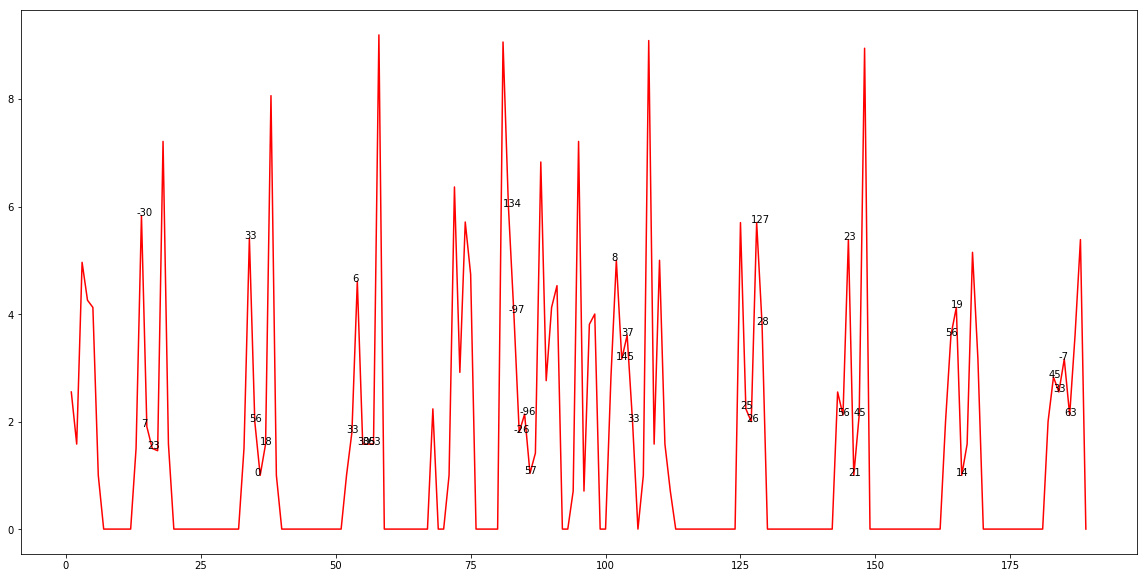

In [187]:
figure(figsize=(20,10))
plt.plot(df['Count'], df[movCol], '-', color='red');
for i in range(len(increaseInd)):
    if df[dirCol][increaseInd[i]] == df[dirCol][increaseInd[i]]:
        plt.annotate(int(df[dirCol][increaseInd[i]]), (increaseInd[i], df[movCol][increaseInd[i]]))

现在annotate的方向是n + 1和 n 的变化。可能需要改成n + 1和resting state 到第一次move的变化